In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [41]:
df = pd.read_csv("/content/Heart Disease.csv")

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
countNoDisease = len(df[df.target == 0])
countNoDisease

138

In [44]:
countHavingHeartDisease = len(df[df.target == 1])
countHavingHeartDisease

165

In [45]:
print("no Heart Disease %: {:.2f}%".format((countNoDisease / (len(df.target))*100)))

no Heart Disease %: 45.54%


In [46]:
print("countHavingHeartDisease %: {:.2f}%".format((countHavingHeartDisease / (len(df.target))*100)))

countHavingHeartDisease %: 54.46%


In [47]:
 #sex - (1 = male; 0 = female)

 countFemale_havingdisease = len(df[(df['sex'] == 0) & (df['target'] == 1)])
 countFemale_havingdisease



72

In [48]:
countMale_havingdisease = len(df[(df['sex'] == 1) & (df['target'] == 1)])
countMale_havingdisease



93

In [49]:
countFemale_havingdisease = len(df[(df['sex'] == 0) & (df['target'] == 1)])

In [50]:
percentageFemaleTarget1 = (countFemale_havingdisease / len(df[df['sex'] == 0])) * 100
print("Percentage of Female Patients with target=1: {:.2f}%".format(percentageFemaleTarget1))

Percentage of Female Patients with target=1: 75.00%


In [12]:
percentageMaleTarget1 = (countMale_havingdisease / len(df[df['sex'] == 1])) * 100
print("Percentage of Male Patients with target=1: {:.2f}%".format(percentageMaleTarget1))

Percentage of Male Patients with target=1: 44.93%


In [51]:
print("no of Females with Heart Disease %: {:.2f}%".format((countFemale_havingdisease/ (len(df.sex))*100)))

no of Females with Heart Disease %: 23.76%


In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
df.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


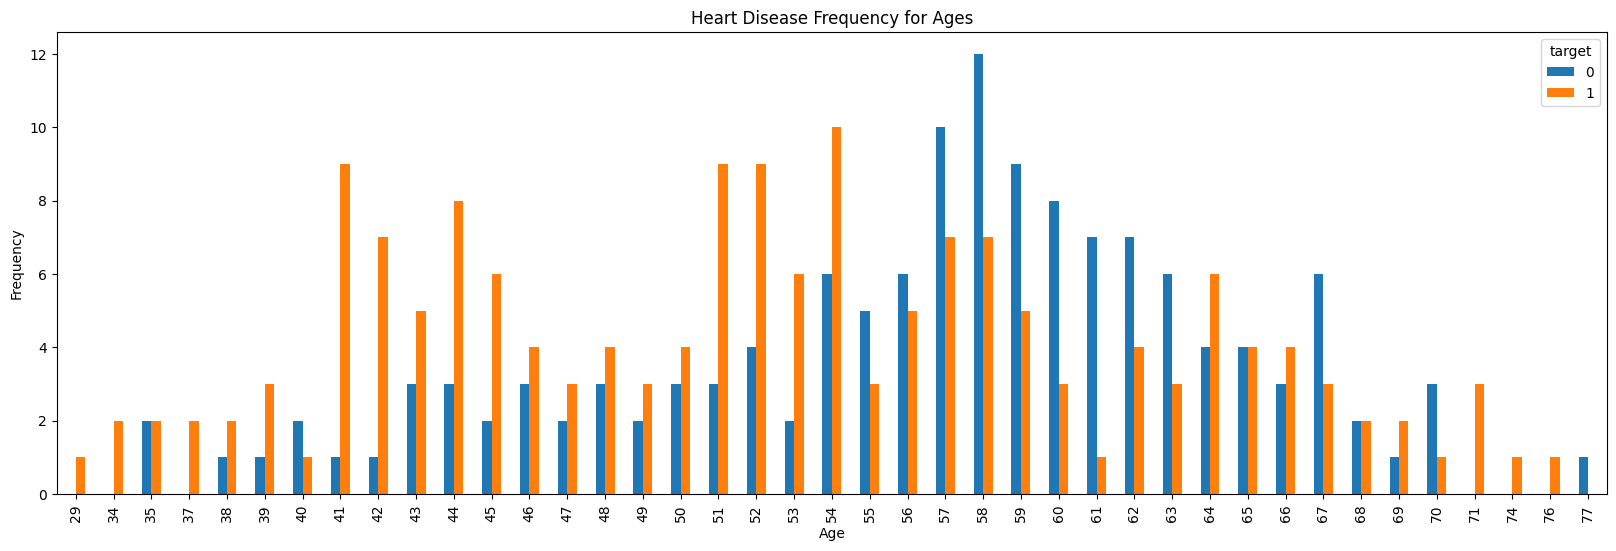

In [54]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

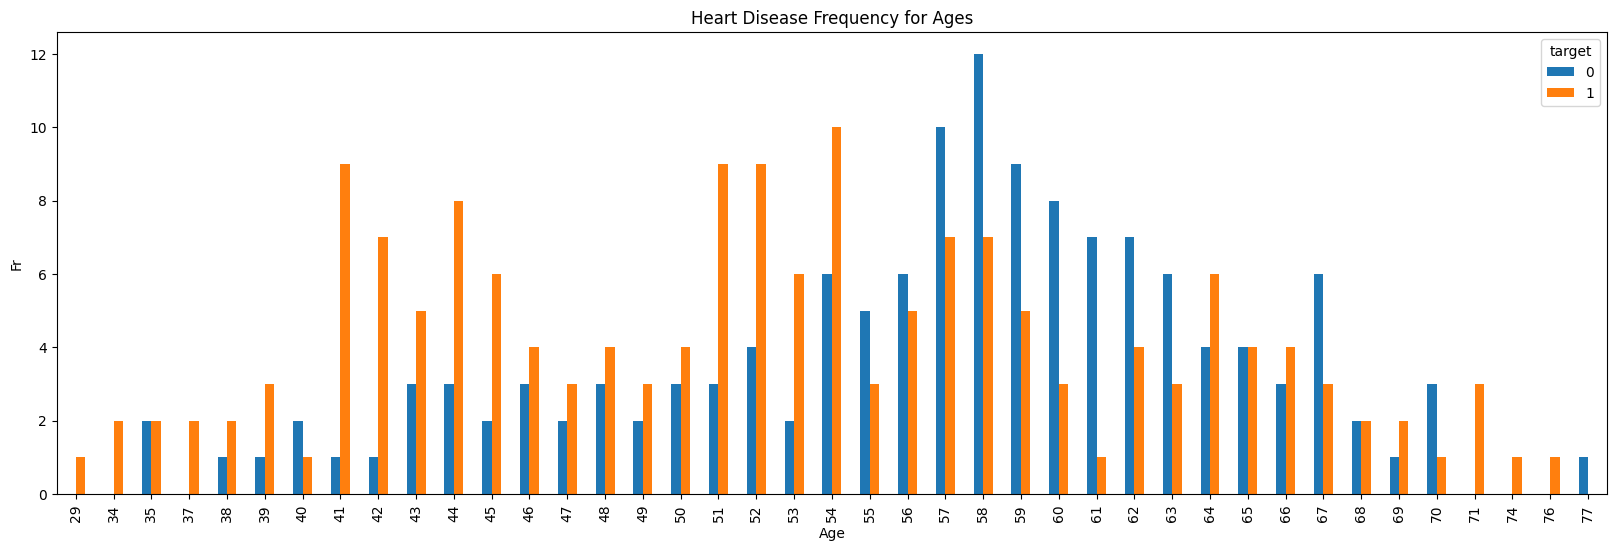

In [55]:
heart_disease = pd.crosstab(df['age'], df['target']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Fr')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

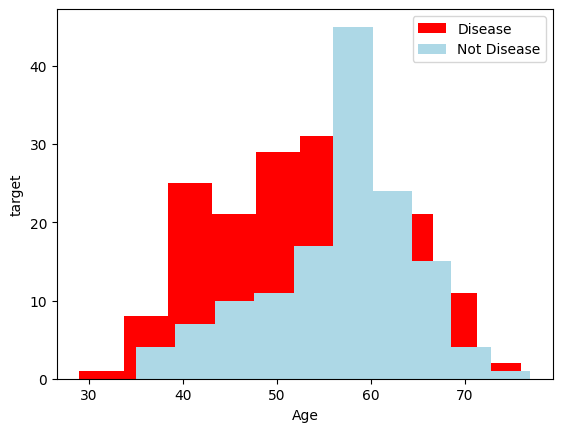

In [56]:
plt.hist(x=df.age[df.target==1],  color ="red")
plt.hist(x=df.age[df.target==0],  color ="lightblue")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("target")
plt.show()

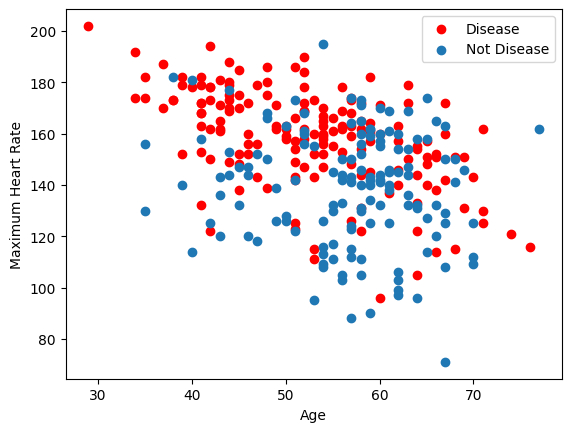

In [57]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

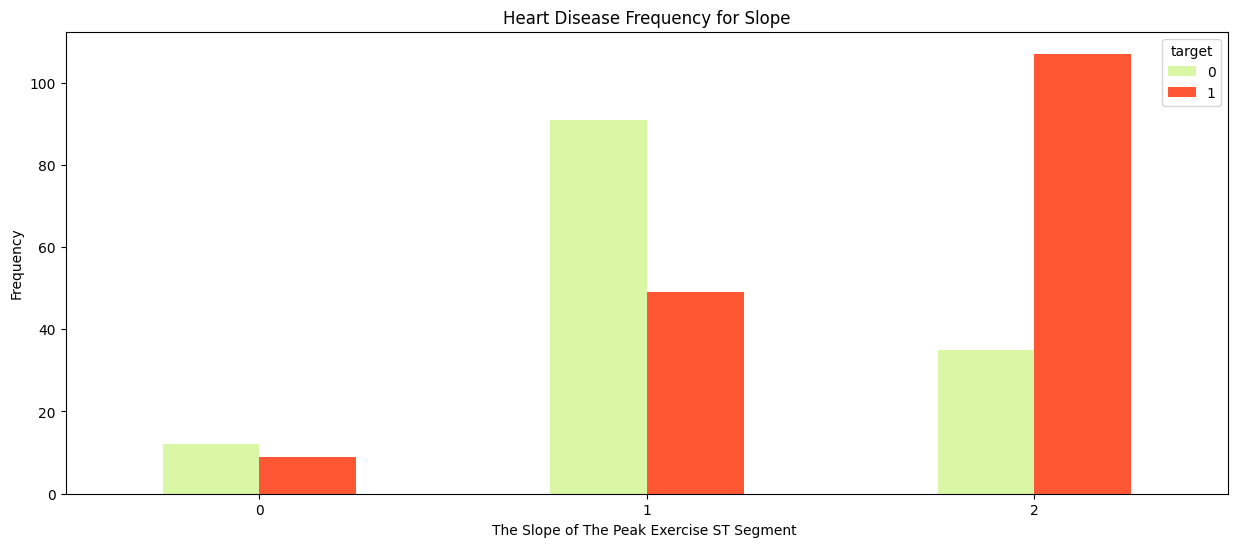

In [58]:
# slope Vs target
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

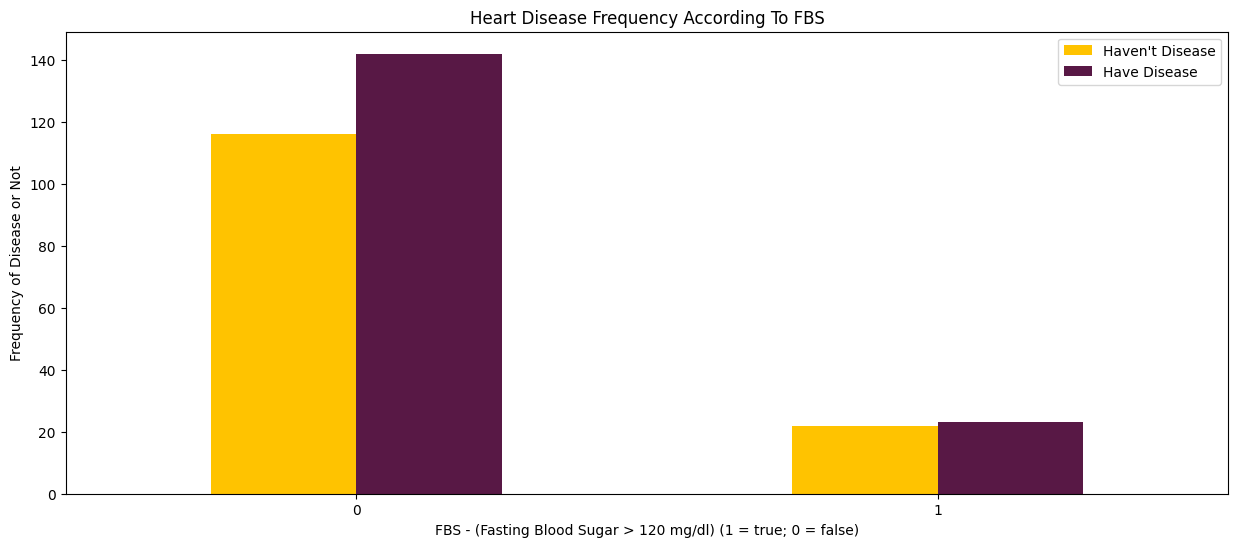

In [59]:
# Fasting sugar fbp Vs target

pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

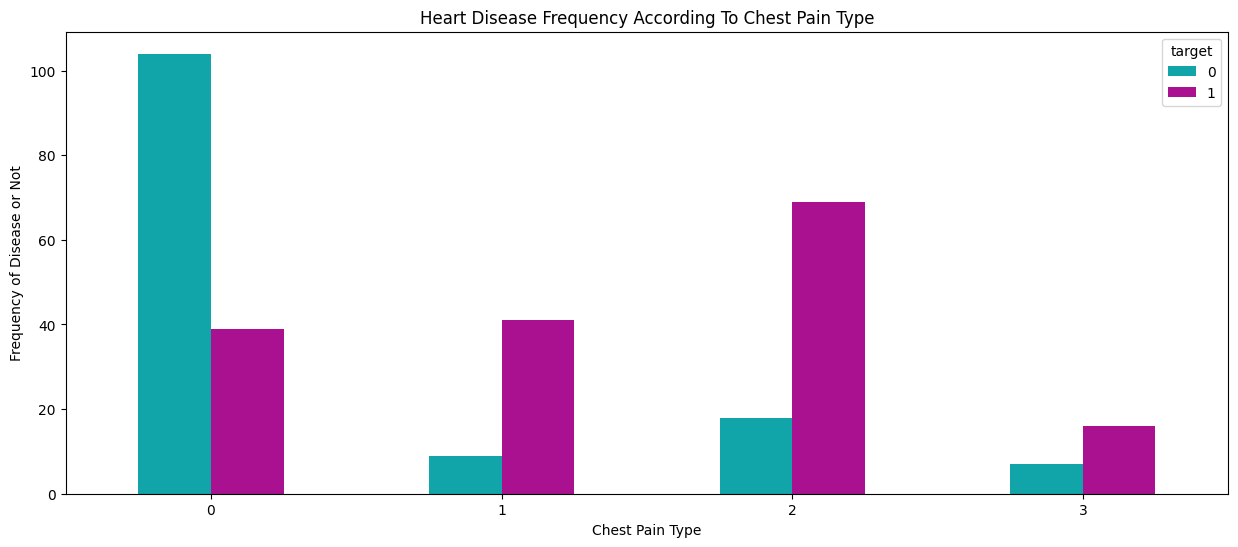

In [60]:
# how chest pain is related to target variable
# cp Vs target (without considering the sex)-overall distribution

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()



In [61]:
# One-Hot Encoding

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [63]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [64]:
df = df.astype("int")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1,...,0,0,0,0,0,0,1,0,1,0


In [65]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0,0,...,0,0,0,0,0,1,0,0,0,1


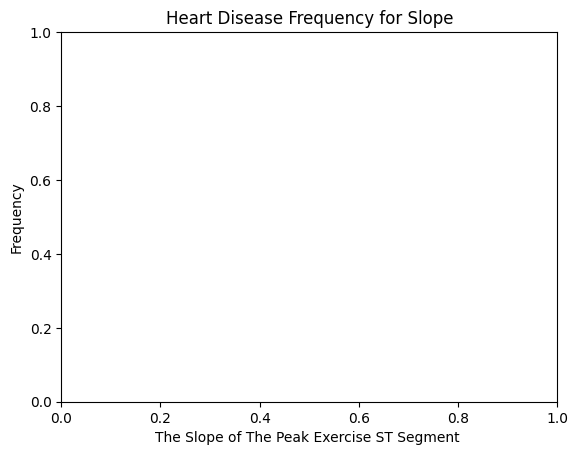

In [28]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

In [31]:
df.fillna(method='ffill', inplace=True)
df


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1,1,...,0,0,0,0,0,0,1,0,1,0


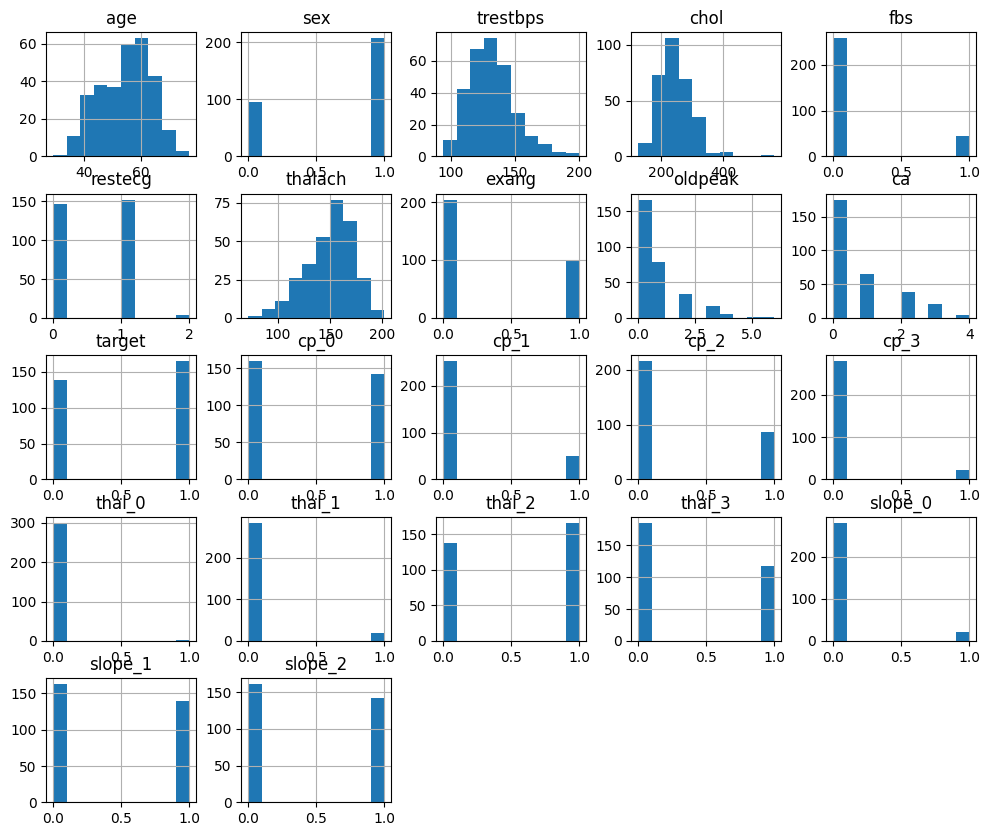

In [34]:
# Histogram of numerical features
df.hist(figsize=(12, 10))
plt.show()



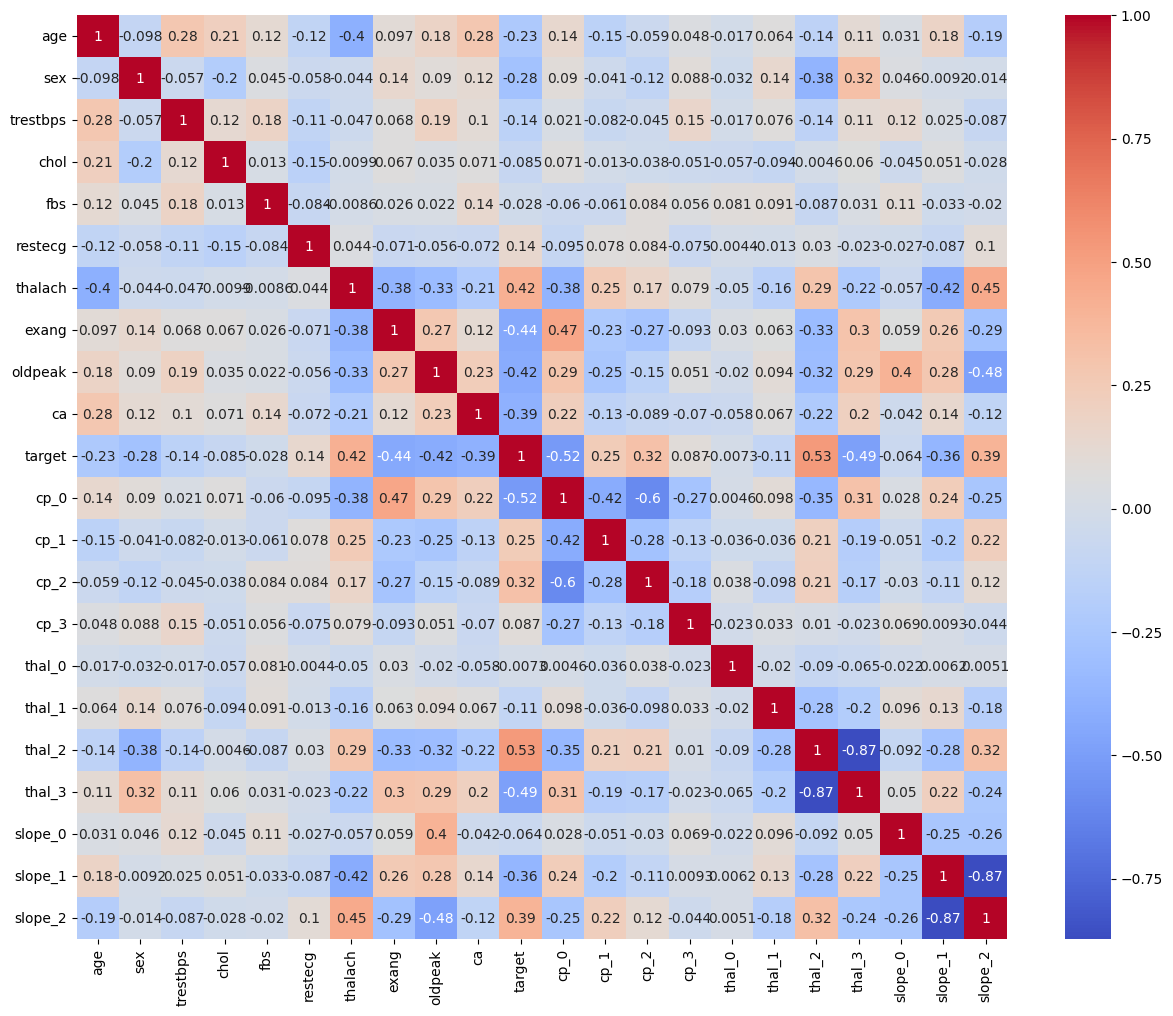

In [38]:
# Correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



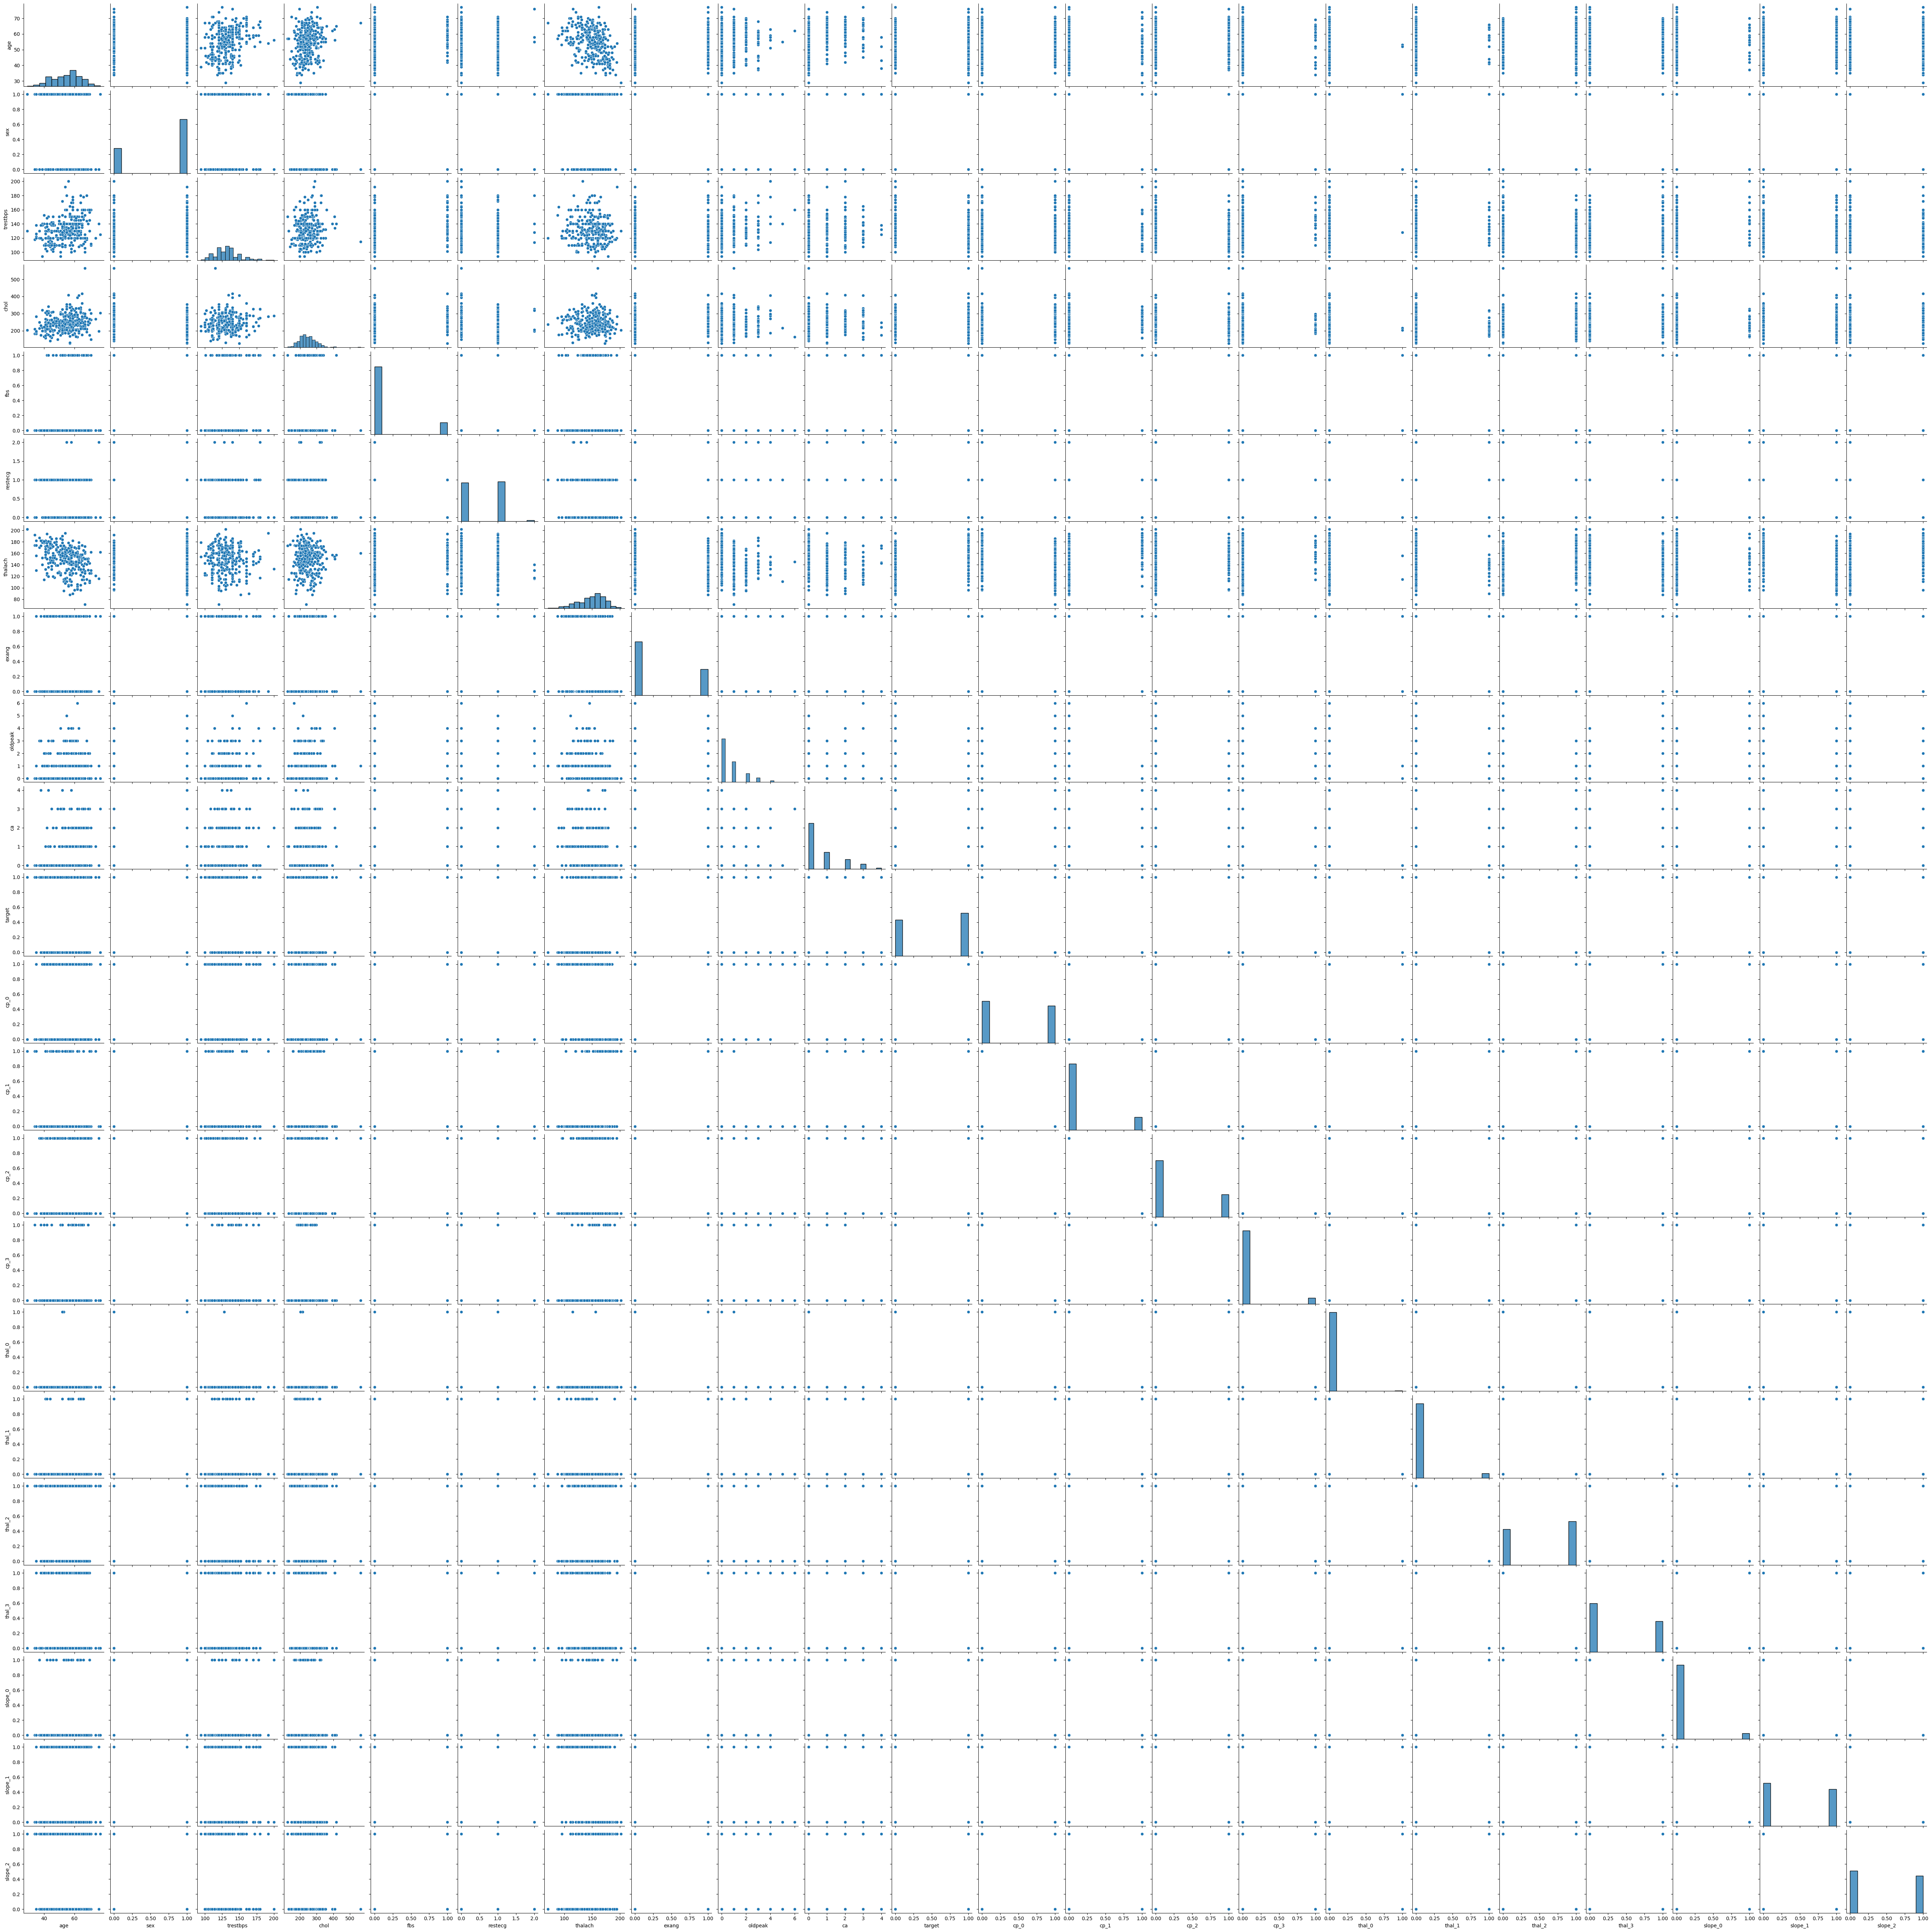

In [36]:
# Pairplot
sns.pairplot(df)
plt.show()

In [67]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

# target value is conitnuous is regression, if target value is categorical then it is classification

In [69]:
# Feature scaling

# Normalize

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [70]:
# Train-Test split on X & Y

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state=0)

In [76]:
y_train.shape

(212,)

In [79]:
x_train.shape

(212, 32)

In [80]:
y_train.shape

(212,)

In [82]:
y_test.shape

(91,)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


In [84]:
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()



In [88]:

# Train and evaluate Logistic Regression
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, y_pred_log_reg)}")


Logistic Regression Accuracy: 0.5164835164835165
Logistic Regression Precision: 0.5164835164835165
Logistic Regression Recall: 1.0
Logistic Regression AUC: 0.5
